In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
import statsmodels.graphics.tsaplots as tsplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa import stattools as stt
from statsmodels import tsa
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings("ignore")

def is_stationary(df, maxlag=52, autolag=None, regression='c'):
    adf_test = stt.adfuller(df.values,maxlag=maxlag, autolag=autolag, regression=regression)
#     print(adf_test)
    adf = adf_test[0]
    cv_5 = adf_test[4]["5%"]
    result = adf < cv_5
#     print(adf, '--', cv_5, result)
    return result


def slidingWindow(TS, swSize): # needs to be corrected
    R = len(TS)
    newSeries = np.zeros((R-swSize+1, swSize))
    for i in range(0,R-swSize+1,1):
        newSeries[i,:] = TS[i:i+swSize].reshape(1,-1)
    return newSeries

# filePath = "Datasets/daily-min-temperatures.csv"
filePath = "Datasets/daily-total-female-births.csv"
# filePath = "Datasets/monthly-sunspots.csv"
# filePath = "Datasets/shampoo.csv"
# filePath = "Datasets/DS_AR2_ddddd6.csv"
# filePath = "Datasets/DS_AR2_ddddd7.csv"
# filePath = "Datasets/DS_AR2_ddddd8_unique.csv"
# filePath = "Datasets/DS_AR2_ddddd9_unique.csv"

csvFile = pd.read_csv(filePath)
print(csvFile)

           Date  Births
0    1959-01-01      35
1    1959-01-02      32
2    1959-01-03      30
3    1959-01-04      31
4    1959-01-05      44
..          ...     ...
360  1959-12-27      37
361  1959-12-28      52
362  1959-12-29      48
363  1959-12-30      55
364  1959-12-31      50

[365 rows x 2 columns]


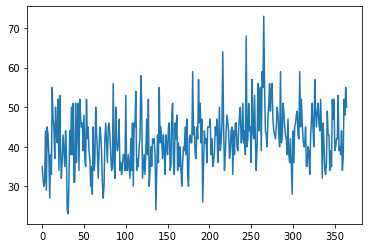

In [2]:
df1 = csvFile['Births']
# df1 = csvFile['Sunspots']
Y = df1.values
plt.plot(Y)

In [3]:

swSize = 4
X = slidingWindow(df1.values, swSize)

trainRatio = .90
train_Thresh = int(X.shape[0]*trainRatio)
print(train_Thresh)



accuracy_or_pred = 1

if accuracy_or_pred==0:
    numsMe = np.random.permutation(X.shape[0])
    trainInds =  numsMe[:train_Thresh]
    testInds  =  numsMe[train_Thresh:]

    trainX, trainY = X[trainInds,:-1], X[trainInds,-1]
    testX,  testY  = X[testInds,:-1],  X[testInds,-1]
else:
    numsMeTrain = np.random.permutation(train_Thresh)
    trainX, trainY = X[numsMeTrain,:-1], X[numsMeTrain,-1]
    testX,  testY  = X[train_Thresh:,:-1], X[train_Thresh:,-1]
    

regNN = MLPRegressor(activation='relu', solver='lbfgs', max_iter=2000)
regNN.fit(trainX, trainY)


325


MLPRegressor(max_iter=2000, solver='lbfgs')

43.845105178482356 0.13336375894847857


Text(0, 0.5, 'Values')

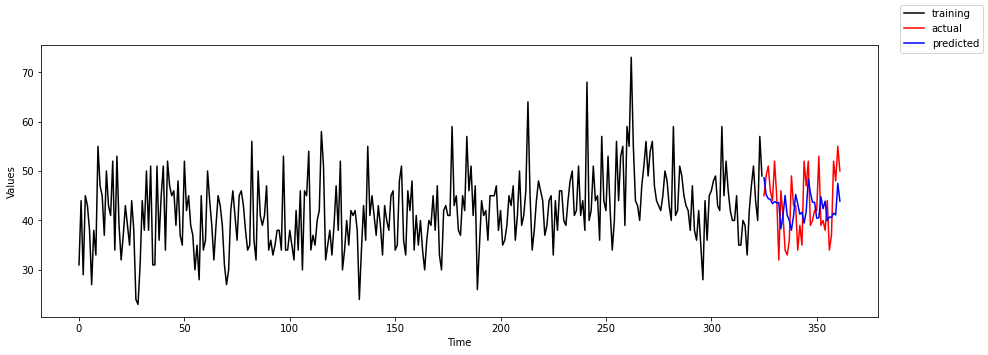

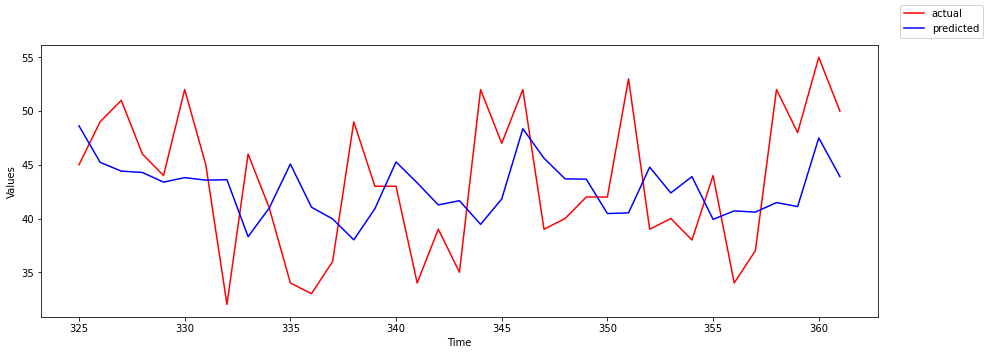

In [4]:

history = X[:train_Thresh,-1]
test_x = X[train_Thresh:,:-1]
test_y = X[train_Thresh:,-1]


predictions = regNN.predict(test_x)

mse_error = mean_squared_error(test_y, predictions)
mape_error = mean_absolute_percentage_error(test_y, predictions)

print(mse_error,mape_error)

trainRange = np.arange(0,train_Thresh,1)
# testRange = np.arange(train_Thresh, Y.shape[0],1)
testRange = np.arange(train_Thresh, train_Thresh + test_y.shape[0],1)
# print(trainRange)
# print(testRange)
ax = plt.figure(figsize=(15,5))
plt.plot(trainRange, history, 'k')
plt.plot(testRange,test_y,'r')
plt.plot(testRange,predictions,'b')
ax.legend(['training', 'actual', 'predicted'])
plt.xlabel('Time')
plt.ylabel('Values')

ax1 = plt.figure(figsize=(15,5))
plt.plot(testRange,test_y,'r')
plt.plot(testRange,predictions,'b')
ax1.legend(['actual', 'predicted'])
plt.xlabel('Time')
plt.ylabel('Values')